In [1]:
# import zipfile

# # Download zip file of pizza_steak images
# !wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip 

# # Unzip the downloaded file
# zip_ref = zipfile.ZipFile("pizza_steak.zip", "r")
# zip_ref.extractall()
# zip_ref.close()

In [2]:
!ls pizza_steak

test  train


In [3]:
!ls pizza_steak/train

pizza  steak


In [4]:
!ls pizza_steak/train/pizza

1008104.jpg  1638227.jpg  2235981.jpg  2774899.jpg  3464027.jpg  576236.jpg
1008144.jpg  1646974.jpg  2236914.jpg  2775763.jpg  3464858.jpg  5764.jpg
1008844.jpg  1649108.jpg  2241448.jpg  2778214.jpg  3473991.jpg  579691.jpg
1008941.jpg  1649276.jpg  2247711.jpg  277963.jpg   3475936.jpg  593400.jpg
1011404.jpg  1652943.jpg  2253670.jpg  2785084.jpg  3478964.jpg  59445.jpg
102037.jpg   1654444.jpg  2255361.jpg  2793535.jpg  3479875.jpg  596494.jpg
1026922.jpg  1660415.jpg  2274117.jpg  27963.jpg    3479936.jpg  598381.jpg
1029698.jpg  1663749.jpg  2279642.jpg  2800325.jpg  3484590.jpg  604977.jpg
1033251.jpg  1665654.jpg  2280345.jpg  2811032.jpg  3493457.jpg  608085.jpg
1035854.jpg  166823.jpg   2285269.jpg  282013.jpg   349946.jpg	 618021.jpg
1038357.jpg  1670471.jpg  2285942.jpg  2821034.jpg  350358.jpg	 61822.jpg
1040878.jpg  1671531.jpg  228778.jpg   2821048.jpg  3505182.jpg  618348.jpg
1044524.jpg  1678284.jpg  2291093.jpg  2827938.jpg  3512070.jpg  625687.jpg
1044789.jpg  16810

In [5]:
import os

# walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk('pizza_steak'):
    print(f'There are {len(dirnames)} directories and {len(filenames)} in {dirpath}')

There are 2 directories and 0 in pizza_steak
There are 2 directories and 0 in pizza_steak/train
There are 0 directories and 750 in pizza_steak/train/pizza
There are 0 directories and 750 in pizza_steak/train/steak
There are 2 directories and 0 in pizza_steak/test
There are 0 directories and 250 in pizza_steak/test/pizza
There are 0 directories and 250 in pizza_steak/test/steak


In [6]:
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))
num_steak_images_train

750

In [7]:
import pathlib
import numpy as np
data_dir = pathlib.Path('pizza_steak/train')
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['pizza' 'steak']


In [8]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
    target_folder = target_dir+target_class
    random_image = random.sample(os.listdir(target_folder), 1)

    img = mpimg.imread(target_folder + '/' + random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis('off');

    print(f'Image shape: {img.shape}')

    return img

Image shape: (384, 512, 3)


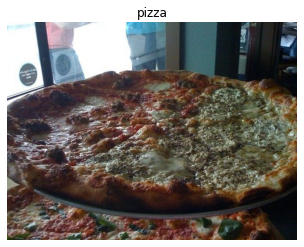

In [9]:
img = view_random_image('pizza_steak/train/', 'pizza')

In [10]:
import tensorflow as tf
tf.constant(img)

2022-02-04 10:22:34.787235: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-04 10:22:34.787250: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-02-04 10:22:36.462075: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-02-04 10:22:36.462090: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-02-04 10:22:36.462108: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (jean): /proc/driver/nvidia/version does not exist
2022-02-04 10:22:36.463200: I tensorflow/core/platform/cpu_feature_guard

<tf.Tensor: shape=(384, 512, 3), dtype=uint8, numpy=
array([[[253, 252, 250],
        [254, 253, 251],
        [255, 254, 255],
        ...,
        [ 77,  94, 112],
        [ 72,  89, 105],
        [ 37,  54,  70]],

       [[255, 254, 252],
        [255, 255, 253],
        [255, 254, 255],
        ...,
        [ 63,  80,  98],
        [ 66,  83,  99],
        [ 45,  62,  78]],

       [[254, 254, 252],
        [254, 254, 252],
        [255, 255, 253],
        ...,
        [ 99, 116, 134],
        [111, 130, 145],
        [109, 128, 143]],

       ...,

       [[ 62,  83,  27],
        [ 48,  68,  15],
        [ 43,  60,  15],
        ...,
        [  7,  12,  16],
        [ 12,  17,  21],
        [  8,  13,  17]],

       [[ 27,  49,   3],
        [ 35,  56,  13],
        [ 24,  42,   2],
        ...,
        [ 18,  23,  27],
        [  0,   5,   9],
        [ 11,  16,  20]],

       [[ 33,  54,  13],
        [ 34,  55,  16],
        [ 40,  57,  21],
        ...,
        [ 10,  15,  1

In [11]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# set the seed
tf.random.set_seed(42)

# preprocess data( get all of the pixel values between 0 and 1)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup paths directory
train_dir = 'pizza_steak/train'
test_dir = 'pizza_steak/test'

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(
    directory=train_dir,
    batch_size=32,
    target_size=(224,224),
    class_mode='binary',
    seed=42
)
valid_data = valid_datagen.flow_from_directory(
    directory=test_dir,
    batch_size=32,
    target_size=(224, 224),
    class_mode='binary',
    seed=42
)

# Build a CNN model ( same as the Tiny VGG on the CNN explainer website)
model_1 = tf.keras.models.Sequential(name='CNN')
model_1.add(tf.keras.layers.Conv2D(
    filters=10,
    kernel_size=3,
    activation='relu',
    input_shape=(224,224,3),
    # name='inputLayer'
))
model_1.add(tf.keras.layers.Conv2D(
    10,
    3,
    activation='relu',
    # name='hidden1'
))
model_1.add(tf.keras.layers.MaxPool2D(
    pool_size=2,
    padding='valid'
))
model_1.add(tf.keras.layers.Conv2D(
    filters=10,
    kernel_size=3,
    activation='relu',
    input_shape=(224,224,3),
    # name='inputLayer'
))
model_1.add(tf.keras.layers.Conv2D(
    10,
    3,
    activation='relu',
    # name='hidden1'
))
model_1.add(tf.keras.layers.MaxPool2D(
    pool_size=2,
    padding='valid'
))
model_1.add(tf.keras.layers.Flatten())
model_1.add(tf.keras.layers.Dense(1, activation='sigmoid'))

# compile CNN
model_1.compile(
    loss='binary_crossentropy',
    optimizer='Adam',
    metrics=['accuracy']
)

# fit the model
history_1 = model_1.fit(
    train_data,
    epochs=5,
    steps_per_epoch=len(train_data),
    validation_data=valid_data,
    validation_steps=len(valid_data)
)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 25s 519ms/step - loss: 0.5537 - accuracy: 0.7367 - val_loss: 0.4044 - val_accuracy: 0.8360
Epoch 2/5
47/47 [==============================] - 23s 493ms/step - loss: 0.4255 - accuracy: 0.8120 - val_loss: 0.3391 - val_accuracy: 0.8520
Epoch 3/5
47/47 [==============================] - 24s 504ms/step - loss: 0.3785 - accuracy: 0.8340 - val_loss: 0.3720 - val_accuracy: 0.8500
Epoch 4/5
47/47 [==============================] - 24s 512ms/step - loss: 0.3679 - accuracy: 0.8440 - val_loss: 0.3764 - val_accuracy: 0.8420
Epoch 5/5
47/47 [==============================] - 24s 500ms/step - loss: 0.3566 - accuracy: 0.8553 - val_loss: 0.3183 - val_accuracy: 0.8600


In [12]:
model_1.summary()

Model: "CNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                           

In [13]:
# set random seed
tf.random.set_seed(42)

# build model
model_2 = tf.keras.Sequential(name='simpleNN')
model_2.add(tf.keras.layers.Flatten(input_shape=(224,224,3)))
model_2.add(tf.keras.layers.Dense(4, activation='relu'))
model_2.add(tf.keras.layers.Dense(4, activation='relu'))
model_2.add(tf.keras.layers.Dense(1, activation='sigmoid'))

# Compile the model
model_2.compile(
    loss='binary_crossentropy',
    optimizer='Adam',
    metrics=['accuracy']
)

# Fit the model
model_2.fit(
    train_data,
    epochs=5,
    steps_per_epoch=len(train_data),
    validation_data=valid_data,
    validation_steps=len(valid_data)
)

Epoch 1/5
47/47 [==============================] - 3s 61ms/step - loss: 1.5894 - accuracy: 0.4947 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 3s 57ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 3s 58ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 3s 66ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 3s 62ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


In [14]:
model_2.summary()

Model: "simpleNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


In [15]:
# set random seed
tf.random.set_seed(42)

# Create the model
model_3 = tf.keras.Sequential(name='betternonCNN')
model_3.add(tf.keras.layers.Flatten(input_shape=(224,224, 3)))
model_3.add(tf.keras.layers.Dense(100, activation='relu'))
model_3.add(tf.keras.layers.Dense(100, activation='relu'))
model_3.add(tf.keras.layers.Dense(100, activation='relu'))
model_3.add(tf.keras.layers.Dense(1, activation='sigmoid'))

# compile the model
model_3.compile(
    loss='binary_crossentropy',
    optimizer='Adam',
    metrics=['accuracy']
)

# Fit the model
model_3.fit(
    train_data,
    epochs=5,
    steps_per_epoch=len(train_data),
    validation_data=valid_data,
    validation_steps=len(valid_data)
)

Epoch 1/5
47/47 [==============================] - 4s 82ms/step - loss: 5.6273 - accuracy: 0.6093 - val_loss: 2.5123 - val_accuracy: 0.6580
Epoch 2/5
47/47 [==============================] - 4s 79ms/step - loss: 1.1595 - accuracy: 0.6960 - val_loss: 0.5599 - val_accuracy: 0.7800
Epoch 3/5
47/47 [==============================] - 4s 78ms/step - loss: 0.6753 - accuracy: 0.7320 - val_loss: 0.4686 - val_accuracy: 0.8000
Epoch 4/5
47/47 [==============================] - 4s 79ms/step - loss: 0.6314 - accuracy: 0.7567 - val_loss: 0.4211 - val_accuracy: 0.7880
Epoch 5/5
47/47 [==============================] - 4s 76ms/step - loss: 0.5499 - accuracy: 0.7720 - val_loss: 0.5152 - val_accuracy: 0.7600


In [16]:
model_3.summary()

Model: "betternonCNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


Image shape: (341, 512, 3)
Image shape: (384, 512, 3)


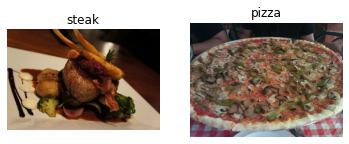

In [17]:
# visualize data
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image('pizza_steak/train/', 'steak')
plt.subplot(1, 2, 2)
pizza_img = view_random_image('pizza_steak/train/', 'pizza')

In [1]:
# Define directory dataset paths
train_dir = 'pizza_steak/train/'
test_dir = 'pizza_steak/test/'

In [2]:
# Create train and test data generators and rescale the data 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

2022-02-05 16:57:39.872402: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-05 16:57:39.872415: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [3]:
# Turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224, 224),
                                               class_mode='binary',
                                               batch_size=32)

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224, 224),
                                             class_mode='binary',
                                             batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [4]:
# Get a sample of the training data batch 
images, labels = train_data.next() # get the 'next' batch of images/labels
len(images), len(labels)

(32, 32)

In [5]:
# Get the first two images
images[:2], images[0].shape


(array([[[[0.09411766, 0.02745098, 0.        ],
          [0.08627451, 0.01960784, 0.        ],
          [0.09411766, 0.02352941, 0.        ],
          ...,
          [0.24313727, 0.14117648, 0.09019608],
          [0.24705884, 0.13725491, 0.09019608],
          [0.24705884, 0.13725491, 0.09019608]],
 
         [[0.08235294, 0.02745098, 0.        ],
          [0.10196079, 0.03529412, 0.00392157],
          [0.12156864, 0.05490196, 0.02352941],
          ...,
          [0.2509804 , 0.14901961, 0.09803922],
          [0.25490198, 0.14509805, 0.09803922],
          [0.24705884, 0.13725491, 0.09019608]],
 
         [[0.12156864, 0.06666667, 0.03137255],
          [0.12941177, 0.07450981, 0.03921569],
          [0.13725491, 0.07058824, 0.03921569],
          ...,
          [0.25490198, 0.15294118, 0.10196079],
          [0.2509804 , 0.14901961, 0.09803922],
          [0.2392157 , 0.13725491, 0.08627451]],
 
         ...,
 
         [[0.6       , 0.2901961 , 0.03137255],
          [0.70196

In [6]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [10]:
model_4 = Sequential([
    Conv2D(
        filters=10,
        kernel_size=3,
        strides=1,
        padding='valid',
        activation='relu',
        input_shape=(224,224,3)
    ),
    Conv2D(
        10,
        3,
        activation='relu'
    ),
    Conv2D(
        10,
        3,
        activation='relu'
    ),
    Flatten(),
    Dense(
        1,
        activation='sigmoid'
    )
])

In [8]:
model_4.compile(
    loss='binary_crossentropy',
    optimizer=Adam(),
    metrics=['accuracy']
)

In [9]:
model_4.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_2 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten (Flatten)           (None, 475240)            0         
                                                                 
 dense (Dense)               (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


In [30]:
history_4 = model_4.fit(
    train_data,
    epochs=5,
    steps_per_epoch=len(train_data),
    validation_data=test_data,
    validation_steps=len(test_data)
)

Epoch 1/5
47/47 [==============================] - 29s 612ms/step - loss: 1.6193 - accuracy: 0.5420 - val_loss: 0.6311 - val_accuracy: 0.6760
Epoch 2/5
47/47 [==============================] - 28s 586ms/step - loss: 0.5184 - accuracy: 0.7427 - val_loss: 0.5127 - val_accuracy: 0.7320
Epoch 3/5
47/47 [==============================] - 27s 584ms/step - loss: 0.3384 - accuracy: 0.8620 - val_loss: 0.4624 - val_accuracy: 0.7960
Epoch 4/5
47/47 [==============================] - 27s 584ms/step - loss: 0.1573 - accuracy: 0.9607 - val_loss: 0.4138 - val_accuracy: 0.8240
Epoch 5/5
47/47 [==============================] - 28s 585ms/step - loss: 0.0541 - accuracy: 0.9913 - val_loss: 0.4732 - val_accuracy: 0.7940


**5. Evaluating our model**


Let's look at some evaluating metrics

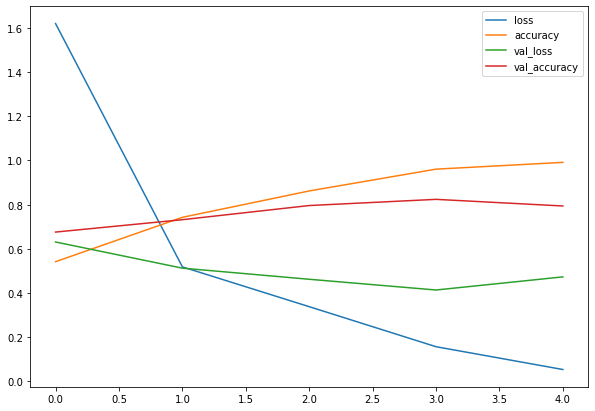

In [31]:
# Plot the training curves
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10, 7));

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_loss_curves(history):
    """
    Returns separate loss curves for training and validation metrics
    """
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']

    epochs = range(len(history.history['loss']))

    # plot loss
    plt.plot(epochs, loss, label='training_loss')
    plt.plot(epochs, val_loss, label='val_loss')
    plt.title('loss')
    plt.xlabel('epochs')
    plt.legend()

    # plot accuracy
    plt.figure()
    plt.plot(epochs, accuracy, label='trainning_accuracy')
    plt.plot(epochs, val_accuracy, label='val_accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend();


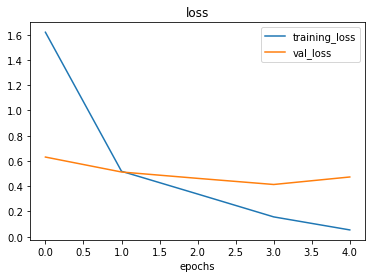

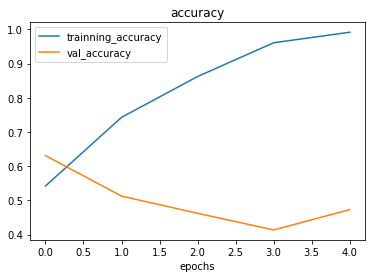

In [33]:
# Check out the loss curves of model_4
plot_loss_curves(history_4)

In [17]:
# Create the model
model_5 = Sequential([
    Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation='sigmoid')
])

# Compile the model
model_5.compile(
    loss='binary_crossentropy',
    optimizer=Adam(),
    metrics=['accuracy']
)

# Fit the model
history_5 = model_5.fit(
    train_data,
    epochs=5,
    steps_per_epoch=len(train_data),
    validation_data=test_data,
    validation_steps=len(test_data)
)

Epoch 1/5
47/47 [==============================] - 10s 202ms/step - loss: 0.5955 - accuracy: 0.6900 - val_loss: 0.4454 - val_accuracy: 0.8220
Epoch 2/5
47/47 [==============================] - 10s 210ms/step - loss: 0.4589 - accuracy: 0.7927 - val_loss: 0.4086 - val_accuracy: 0.8080
Epoch 3/5
47/47 [==============================] - 10s 217ms/step - loss: 0.4109 - accuracy: 0.8220 - val_loss: 0.3520 - val_accuracy: 0.8520
Epoch 4/5
47/47 [==============================] - 10s 209ms/step - loss: 0.4184 - accuracy: 0.8180 - val_loss: 0.3394 - val_accuracy: 0.8540
Epoch 5/5
47/47 [==============================] - 11s 223ms/step - loss: 0.3691 - accuracy: 0.8427 - val_loss: 0.3343 - val_accuracy: 0.8360


In [18]:
model_5.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_13 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 26, 26, 10)      

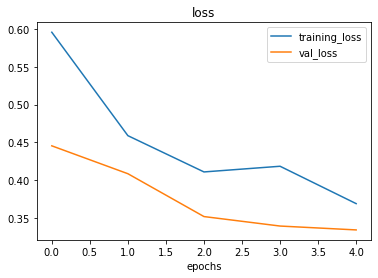

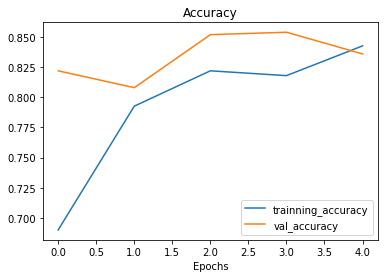

In [25]:
plot_loss_curves(history_5)

In [43]:
# Create ImageDataGenerator training instance with data augmantation
train_datagen_augmented = ImageDataGenerator(
    rescale=1/255.,
    rotation_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

# Create ImageDataGenerator without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)

# Create ImageDataGenerator without data augmentation for the test dataset
test_datagen = ImageDataGenerator(rescale=1/255.)

In [44]:
# Import data and augment it from training directory
print('Augmented training data')
train_data_augmented = train_datagen_augmented.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

print('Non-Augmented training data:')
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

IMG_SIZE = (224, 224)
print('Non-Augmented test data:')
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=32,
    class_mode='binary'
)

Augmented training data
Found 1500 images belonging to 2 classes.
Non-Augmented training data:
Found 1500 images belonging to 2 classes.
Non-Augmented test data:
Found 500 images belonging to 2 classes.


In [45]:
# Get sample data batches
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next()

showing image number: 31


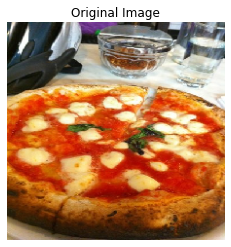

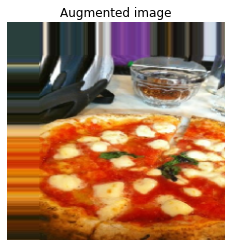

In [46]:
import random

random_number = random.randint(0, 32)
print(f'showing image number: {random_number}')
plt.imshow(images[random_number])
plt.title(f"Original Image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False);

In [48]:
# Create a model (same as model 5)
model_6 = Sequential([
    Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation='sigmoid')
])

# Compile
model_6.compile(
    loss='binary_crossentropy',
    optimizer=Adam(),
    metrics=['accuracy']
)

# Fit the model
history_6 = model_6.fit(
    train_data_augmented,
    epochs=5,
    steps_per_epoch=len(train_data_augmented),
    validation_data=test_data,
    validation_steps=len(test_data)
)

Epoch 1/5
47/47 [==============================] - 16s 326ms/step - loss: 0.7068 - accuracy: 0.5193 - val_loss: 0.6890 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 15s 326ms/step - loss: 0.6941 - accuracy: 0.5120 - val_loss: 0.6791 - val_accuracy: 0.5060
Epoch 3/5
47/47 [==============================] - 15s 320ms/step - loss: 0.6995 - accuracy: 0.5027 - val_loss: 0.6700 - val_accuracy: 0.7200
Epoch 4/5
47/47 [==============================] - 15s 318ms/step - loss: 0.6570 - accuracy: 0.6347 - val_loss: 0.6030 - val_accuracy: 0.6300
Epoch 5/5
47/47 [==============================] - 15s 320ms/step - loss: 0.6232 - accuracy: 0.6573 - val_loss: 0.6388 - val_accuracy: 0.5640


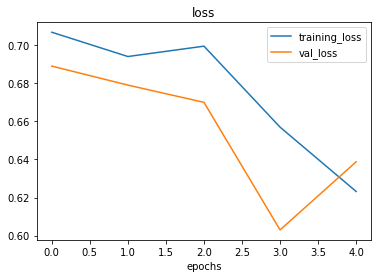

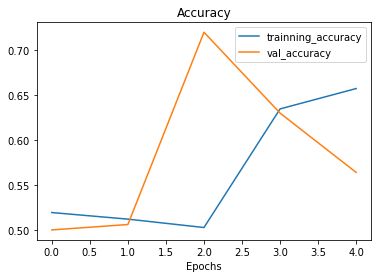

In [49]:
plot_loss_curves(history_6)

In [50]:
print('Augmented training data shuffled')
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=True
)

Augmented training data shuffled
Found 1500 images belonging to 2 classes.


In [56]:
# Create a model (same as model 5)
model_7 = Sequential([
    Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation='sigmoid')
])

# Compile
model_7.compile(
    loss='binary_crossentropy',
    optimizer=Adam(),
    metrics=['accuracy']
)

# Fit the model
history_7 = model_7.fit(
    train_data_augmented_shuffled,
    epochs=5,
    steps_per_epoch=len(train_data_augmented_shuffled),
    validation_data=test_data,
    validation_steps=len(test_data)
)

Epoch 1/5
47/47 [==============================] - 15s 318ms/step - loss: 0.6491 - accuracy: 0.6273 - val_loss: 0.4693 - val_accuracy: 0.7960
Epoch 2/5
47/47 [==============================] - 15s 317ms/step - loss: 0.5437 - accuracy: 0.7273 - val_loss: 0.4633 - val_accuracy: 0.7660
Epoch 3/5
47/47 [==============================] - 15s 319ms/step - loss: 0.4912 - accuracy: 0.7660 - val_loss: 0.3383 - val_accuracy: 0.8640
Epoch 4/5
47/47 [==============================] - 15s 320ms/step - loss: 0.4672 - accuracy: 0.7827 - val_loss: 0.3314 - val_accuracy: 0.8780
Epoch 5/5
47/47 [==============================] - 15s 317ms/step - loss: 0.4792 - accuracy: 0.7800 - val_loss: 0.3281 - val_accuracy: 0.8660


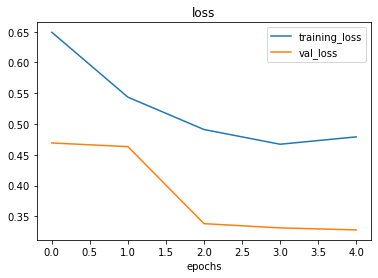

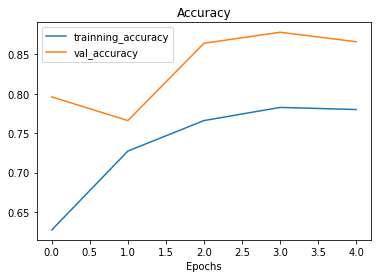

In [57]:
plot_loss_curves(history_7)